In [1]:
# change the cell width
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
import pandas as pd
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

In [3]:
pd.options.display.max_rows=None
pd.options.display.max_columns=None

# Importing Basic Libraries

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import matplotlib as mpl
mpl.style.use('ggplot')

# Data Acquisition

In [5]:
df = pd.read_csv('OnlineNewsPopularity.csv')

In [6]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


# PCA

PCA is essentially a method that reduces the dimension of the feature space in such a way that new variables are orthogonal to each other (i.e. they are independent or not correlated). 

## Scaling

In [7]:
df.head()

,url,timedelta,n_tokens_title,n_tokens_content,n_unique_tokens,n_non_stop_words,n_non_stop_unique_tokens,num_hrefs,num_self_hrefs,num_imgs,num_videos,average_token_length,num_keywords,data_channel_is_lifestyle,data_channel_is_entertainment,data_channel_is_bus,data_channel_is_socmed,data_channel_is_tech,data_channel_is_world,kw_min_min,kw_max_min,kw_avg_min,kw_min_max,kw_max_max,kw_avg_max,kw_min_avg,kw_max_avg,kw_avg_avg,self_reference_min_shares,self_reference_max_shares,self_reference_avg_sharess,weekday_is_monday,weekday_is_tuesday,weekday_is_wednesday,weekday_is_thursday,weekday_is_friday,weekday_is_saturday,weekday_is_sunday,is_weekend,LDA_00,LDA_01,LDA_02,LDA_03,LDA_04,global_subjectivity,global_sentiment_polarity,global_rate_positive_words,global_rate_negative_words,rate_positive_words,rate_negative_words,avg_positive_polarity,min_positive_polarity,max_positive_polarity,avg_negative_polarity,min_negative_polarity,max_negative_polarity,title_subjectivity,title_sentiment_polarity,abs_title_subjectivity,abs_title_sentiment_polarity,shares
0,http://mashable.com/2013/01/07/amazon-instant-...,731.0,12.0,219.0,0.663594,1.0,0.815385,4.0,2.0,1.0,0.0,4.680365,5.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,496.0,496.0,496.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.500331,0.378279,0.040005,0.041263,0.040123,0.521617,0.092562,0.045662,0.013699,0.769231,0.230769,0.378636,0.100000,0.7,-0.350000,-0.600,-0.200000,0.500000,-0.187500,0.000000,0.187500,593
1,http://mashable.com/2013/01/07/ap-samsung-spon...,731.0,9.0,255.0,0.604743,1.0,0.791946,3.0,1.0,1.0,0.0,4.913725,4.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.799756,0.050047,0.050096,0.050101,0.050001,0.341246,0.148948,0.043137,0.015686,0.733333,0.266667,0.286915,0.033333,0.7,-0.118750,-0.125,-0.100000,0.000000,0.000000,0.500000,0.000000,711
2,http://mashable.com/2013/01/07/apple-40-billio...,731.0,9.0,211.0,0.575130,1.0,0.663866,3.0,1.0,1.0,0.0,4.393365,6.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,918.0,918.0,918.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.217792,0.033334,0.033351,0.033334,0.682188,0.702222,0.323333,0.056872,0.009479,0.857143,0.142857,0.495833,0.100000,1.0,-0.466667,-0.800,-0.133333,0.000000,0.000000,0.500000,0.000000,1500
3,http://mashable.com/2013/01/07/astronaut-notre...,731.0,9.0,531.0,0.503788,1.0,0.665635,9.0,0.0,1.0,0.0,4.404896,7.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028573,0.419300,0.494651,0.028905,0.028572,0.429850,0.100705,0.041431,0.020716,0.666667,0.333333,0.385965,0.136364,0.8,-0.369697,-0.600,-0.166667,0.000000,0.000000,0.500000,0.000000,1200
4,http://mashable.com/2013/01/07/att-u-verse-apps/,731.0,13.0,1072.0,0.415646,1.0,0.540890,19.0,19.0,20.0,0.0,4.682836,7.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,545.0,16000.0,3151.157895,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.028633,0.028794,0.028575,0.028572,0.885427,0.513502,0.281003,0.074627,0.012127,0.860215,0.139785,0.411127,0.033333,1.0,-0.220192,-0.500,-0.050000,0.454545,0.136364,0.045455,0.136364,505


In [8]:
df2 = df.iloc[:,1:]

from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()#instantiate
scaler.fit(df2)
df_scaled = scaler.transform(df2)
df_scaled

array([[ 1.75788035,  0.75744723, -0.69521045, ..., -1.81071884,
         0.13891975, -0.24102756],
       [ 1.75788035, -0.66165665, -0.61879381, ...,  0.83774863,
        -0.68965812, -0.23087859],
       [ 1.75788035, -0.66165665, -0.71219192, ...,  0.83774863,
        -0.68965812, -0.16301816],
       ...,
       [-1.61808342, -0.18862202, -0.2218518 , ..., -1.56994907,
        -0.08705603, -0.12861489],
       [-1.61808342, -2.08076053,  0.28759248, ...,  0.83774863,
        -0.68965812, -0.19742142],
       [-1.61808342, -0.18862202, -0.82681689, ..., -0.92789635,
         0.41511238, -0.18021979]])

## Apply PCA

In [9]:
from sklearn.decomposition import PCA
# Make an instance of the Model
pca = PCA(.95)

.95 for the number of components parameter. It means that scikit-learn choose the minimum number of principal components such that 95% of the variance is retained.

In [10]:
pca.fit(df_scaled)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [11]:
df_scaled_pca = pca.transform(df_scaled)

In [12]:
# You can find out how many components PCA choose after fitting the model using pca.n_components_ . 
# In this case, 95% of the variance amounts to 330 principal components.
pca.n_components_

38

In [13]:
# variance by each component
pca.explained_variance_.round(2)

array([4.88, 4.13, 3.61, 3.  , 2.81, 2.59, 2.54, 2.29, 2.13, 2.08, 2.  ,
       1.89, 1.66, 1.39, 1.37, 1.24, 1.23, 1.21, 1.19, 1.17, 1.13, 1.09,
       1.05, 0.98, 0.91, 0.87, 0.81, 0.72, 0.68, 0.66, 0.61, 0.57, 0.56,
       0.53, 0.47, 0.46, 0.44, 0.41])

In [14]:
# explained variance ratio in terms of percentage of each PC component
exp_var = pca.explained_variance_ratio_
exp_var = np.round(exp_var*100, decimals=1)
exp_var

array([8.1, 6.9, 6. , 5. , 4.7, 4.3, 4.2, 3.8, 3.5, 3.5, 3.3, 3.1, 2.8,
       2.3, 2.3, 2.1, 2. , 2. , 2. , 2. , 1.9, 1.8, 1.7, 1.6, 1.5, 1.4,
       1.4, 1.2, 1.1, 1.1, 1. , 1. , 0.9, 0.9, 0.8, 0.8, 0.7, 0.7])

In [15]:
# Cumulative explained variance ratio

# if i want to capture 80 percent variance i use this
np.cumsum(exp_var)

array([ 8.1, 15. , 21. , 26. , 30.7, 35. , 39.2, 43. , 46.5, 50. , 53.3,
       56.4, 59.2, 61.5, 63.8, 65.9, 67.9, 69.9, 71.9, 73.9, 75.8, 77.6,
       79.3, 80.9, 82.4, 83.8, 85.2, 86.4, 87.5, 88.6, 89.6, 90.6, 91.5,
       92.4, 93.2, 94. , 94.7, 95.4])

In [16]:
labels = ['PC' + str(x) for x in range(1, len(exp_var)+1)]

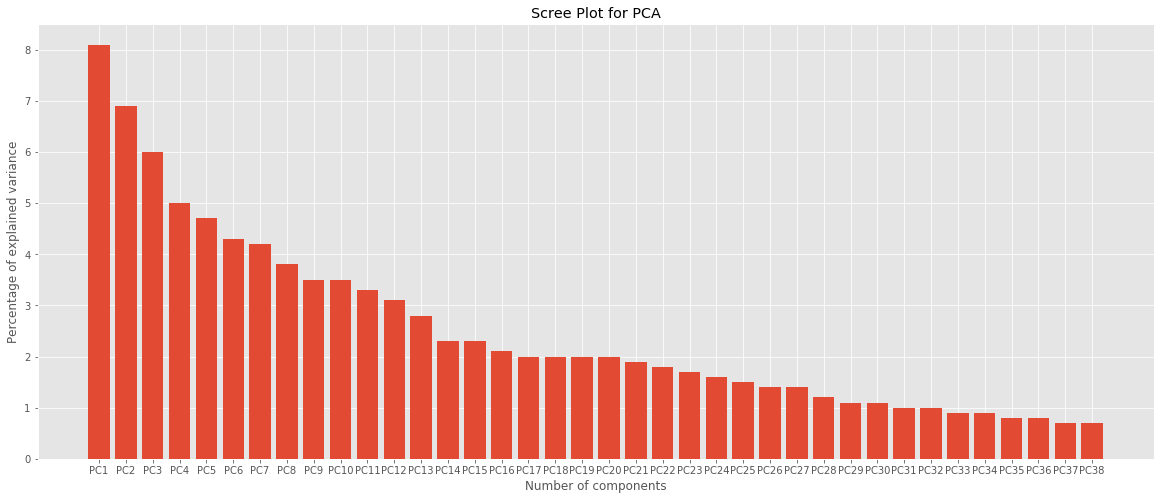

In [17]:
plt.figure(figsize=(20,8))
s = plt.bar(x = range(1, len(exp_var)+1), height = exp_var, tick_label = labels)
plt.xlabel("Number of components")
plt.ylabel("Percentage of explained variance")
plt.title("Scree Plot for PCA")
plt.show()

In [18]:
# pca
df_scaled_pca

array([[-1.34648179, -1.92109268, -1.96165114, ..., -0.05711869,
         0.18727658, -0.80930013],
       [ 0.21200733, -4.32405381, -1.08692318, ...,  0.86675434,
         0.01389532, -0.41399143],
       [-3.71738   , -3.53324826, -1.70058596, ..., -0.57026173,
        -0.69138673, -0.68377003],
       ...,
       [ 0.47004952,  2.63954765,  0.0234722 , ..., -0.89567761,
        -0.57005601,  1.0408702 ],
       [ 3.58087321,  0.20797442, -3.17201431, ..., -0.23334651,
         0.10592143,  1.21826544],
       [ 0.7852592 ,  0.62248651,  2.27154452, ..., -0.67127838,
        -0.45231596,  1.14452101]])

# Clustering

## Partitioning Clustering - KMeans

### Finding the right number of clusters

In [19]:
cluster_range=range(1,10)
cluster_wss=[]

from sklearn.cluster import KMeans
for num_clusters in cluster_range:
    clusters=KMeans(num_clusters)
    clusters.fit(df_scaled_pca)
    cluster_wss.append(clusters.inertia_)    # store WSS of cluster

from collections import OrderedDict
clusters_df=pd.DataFrame(OrderedDict ({'num_clusters':cluster_range, 'cluster_wss': cluster_wss}))
clusters_df[0:9]

,num_clusters,cluster_wss
0,1,2.273929e+06
1,2,2.156549e+06
2,3,2.034463e+06
3,4,1.939856e+06
4,5,1.861430e+06
5,6,1.795685e+06
6,7,1.676815e+06
7,8,1.622567e+06
8,9,1.568685e+06


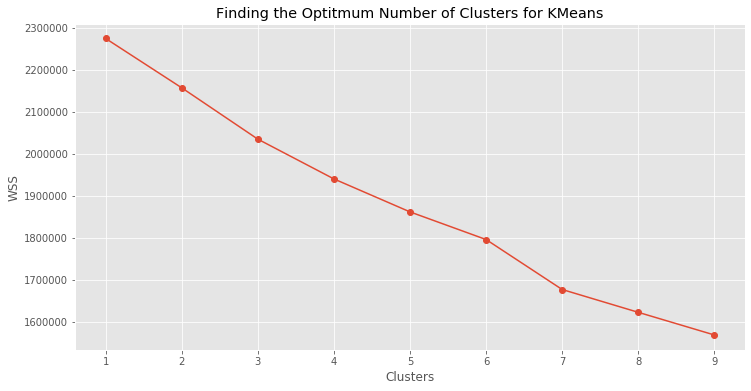

In [20]:
plt.figure(figsize=(12,6))
plt.xlabel('Clusters')
plt.ylabel('WSS')
plt.title('Finding the Optitmum Number of Clusters for KMeans')
plt.xticks(np.arange(min(clusters_df.num_clusters),max(clusters_df.num_clusters)+1, 1.0))  # on x-axis, tick marks after interval of 1
plt.plot(clusters_df.num_clusters, clusters_df.cluster_wss, marker="o")
plt.show()

### Building Cluster model

In [21]:
# kcluster=KMeans(n_clusters=5, random_state=0)
clusterNum = 5
k_means = KMeans(init = "k-means++", n_clusters = clusterNum, n_init = 12, random_state=0)
k_means.fit(df_scaled_pca)
labels = k_means.labels_
print(labels)

[0 2 3 ... 0 1 0]


### Adding CLuster Labels o the dataset

In [22]:
# Creating a scaled DataFrame
pca_components = ['PCA 1','PCA 2','PCA 3','PCA 4','PCA 5','PCA 6','PCA 7','PCA 8','PCA 9','PCA 10',
                 'PCA 11','PCA 12','PCA 13','PCA 14','PCA 15','PCA 16','PCA 17','PCA 18','PCA 19','PCA 20',
                 'PCA 21','PCA 22','PCA 23','PCA 24','PCA 25','PCA 26','PCA 27','PCA 28','PCA 29','PCA 30',
                 'PCA 31','PCA 32','PCA 33','PCA 34','PCA 35','PCA 36','PCA 37','PCA 38']
df_scaled_pca_2 = pd.DataFrame(df_scaled_pca, columns=pca_components)

In [23]:
df_scaled_pca_2.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,PCA 11,PCA 12,PCA 13,PCA 14,PCA 15,PCA 16,PCA 17,PCA 18,PCA 19,PCA 20,PCA 21,PCA 22,PCA 23,PCA 24,PCA 25,PCA 26,PCA 27,PCA 28,PCA 29,PCA 30,PCA 31,PCA 32,PCA 33,PCA 34,PCA 35,PCA 36,PCA 37,PCA 38
0,-1.346482,-1.921093,-1.961651,-0.001003,0.431860,-3.605846,1.419653,-1.420487,0.450805,0.265685,0.365789,1.116218,1.807230,0.100658,0.902113,-0.596722,-0.117856,2.131291,-0.627408,0.686863,-0.227224,-0.136405,0.158003,-0.121027,1.069085,-0.381929,0.726526,-1.239732,-0.135127,0.274896,-0.315007,-0.170605,0.175086,0.641672,-0.605713,-0.057119,0.187277,-0.809300
1,0.212007,-4.324054,-1.086923,0.082443,-0.337429,-1.561990,3.364196,0.282645,1.918319,-1.291279,0.635072,0.003326,0.494003,0.346531,-0.957267,-0.469335,0.141144,1.946049,-0.852819,0.768441,-0.159024,-0.136321,0.227551,-0.183260,-0.369700,-0.264940,-0.242786,-0.533799,-0.941646,0.567461,0.453207,0.178056,0.214969,-0.439123,-0.343106,0.866754,0.013895,-0.413991
2,-3.717380,-3.533248,-1.700586,-0.078797,-0.371185,-0.856487,2.503518,-0.286480,-0.254613,-0.617918,-0.273029,-0.130118,0.374451,-0.614231,0.043485,-0.025702,0.082983,1.639612,-1.574259,1.091788,-0.476355,-0.599641,0.532099,-0.171801,-0.462989,-0.622307,-1.186312,-0.667690,0.419943,-0.401958,0.471829,-0.782755,0.302528,0.438693,0.188182,-0.570262,-0.691387,-0.683770
3,-0.658392,-1.742104,-3.415164,-0.106850,1.202843,-2.168631,1.391536,-1.013089,-0.524135,-0.920876,0.015084,2.147640,0.786565,0.364125,0.294820,-0.512987,-0.149287,1.855488,-0.825746,0.635655,-0.886281,0.186357,0.131960,-0.141282,-0.556180,0.279354,-0.642984,-0.168902,0.523625,0.210591,0.055148,-0.289844,-0.177927,0.379114,-0.395015,0.156865,-0.341061,-0.844030
4,-4.154868,-3.752311,-1.404041,-0.132311,0.394229,0.347744,-2.743883,-1.437257,0.536318,-0.874843,2.864026,-0.678773,-0.087058,0.794212,0.801106,-0.666250,-0.033737,2.608072,-0.359347,0.991803,1.225445,-0.867608,0.158701,-0.252290,1.469437,-0.683645,0.903396,-0.126708,-0.694862,0.734807,0.645368,-1.844846,0.816197,-0.080788,0.713420,-0.009515,0.298214,-0.370774


In [24]:
df_scaled_pca_2["Clus_km"] = labels
df_scaled_pca_2.head(5)

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,PCA 11,PCA 12,PCA 13,PCA 14,PCA 15,PCA 16,PCA 17,PCA 18,PCA 19,PCA 20,PCA 21,PCA 22,PCA 23,PCA 24,PCA 25,PCA 26,PCA 27,PCA 28,PCA 29,PCA 30,PCA 31,PCA 32,PCA 33,PCA 34,PCA 35,PCA 36,PCA 37,PCA 38,Clus_km
0,-1.346482,-1.921093,-1.961651,-0.001003,0.431860,-3.605846,1.419653,-1.420487,0.450805,0.265685,0.365789,1.116218,1.807230,0.100658,0.902113,-0.596722,-0.117856,2.131291,-0.627408,0.686863,-0.227224,-0.136405,0.158003,-0.121027,1.069085,-0.381929,0.726526,-1.239732,-0.135127,0.274896,-0.315007,-0.170605,0.175086,0.641672,-0.605713,-0.057119,0.187277,-0.809300,0
1,0.212007,-4.324054,-1.086923,0.082443,-0.337429,-1.561990,3.364196,0.282645,1.918319,-1.291279,0.635072,0.003326,0.494003,0.346531,-0.957267,-0.469335,0.141144,1.946049,-0.852819,0.768441,-0.159024,-0.136321,0.227551,-0.183260,-0.369700,-0.264940,-0.242786,-0.533799,-0.941646,0.567461,0.453207,0.178056,0.214969,-0.439123,-0.343106,0.866754,0.013895,-0.413991,2
2,-3.717380,-3.533248,-1.700586,-0.078797,-0.371185,-0.856487,2.503518,-0.286480,-0.254613,-0.617918,-0.273029,-0.130118,0.374451,-0.614231,0.043485,-0.025702,0.082983,1.639612,-1.574259,1.091788,-0.476355,-0.599641,0.532099,-0.171801,-0.462989,-0.622307,-1.186312,-0.667690,0.419943,-0.401958,0.471829,-0.782755,0.302528,0.438693,0.188182,-0.570262,-0.691387,-0.683770,3
3,-0.658392,-1.742104,-3.415164,-0.106850,1.202843,-2.168631,1.391536,-1.013089,-0.524135,-0.920876,0.015084,2.147640,0.786565,0.364125,0.294820,-0.512987,-0.149287,1.855488,-0.825746,0.635655,-0.886281,0.186357,0.131960,-0.141282,-0.556180,0.279354,-0.642984,-0.168902,0.523625,0.210591,0.055148,-0.289844,-0.177927,0.379114,-0.395015,0.156865,-0.341061,-0.844030,0
4,-4.154868,-3.752311,-1.404041,-0.132311,0.394229,0.347744,-2.743883,-1.437257,0.536318,-0.874843,2.864026,-0.678773,-0.087058,0.794212,0.801106,-0.666250,-0.033737,2.608072,-0.359347,0.991803,1.225445,-0.867608,0.158701,-0.252290,1.469437,-0.683645,0.903396,-0.126708,-0.694862,0.734807,0.645368,-1.844846,0.816197,-0.080788,0.713420,-0.009515,0.298214,-0.370774,3


## Cluster Profiling

In [25]:
# df2[df2['Clus_km']==0]
# cluster 0 = lda 3 and lda 1
# cluster 1 = lda 2
# cluster 2 = lda 0
# cluster 3 = lda 4
# cluster 4 = lda in no category

# Multi-Class Classification

In [26]:
import warnings
warnings.filterwarnings('ignore')

In [27]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier, AdaBoostClassifier, GradientBoostingClassifier, VotingClassifier
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV, train_test_split
from sklearn.metrics import confusion_matrix, classification_report
from scipy.stats import shapiro, mannwhitneyu

## Splitting the data

In [28]:
df_scaled_pca_2.head()

,PCA 1,PCA 2,PCA 3,PCA 4,PCA 5,PCA 6,PCA 7,PCA 8,PCA 9,PCA 10,PCA 11,PCA 12,PCA 13,PCA 14,PCA 15,PCA 16,PCA 17,PCA 18,PCA 19,PCA 20,PCA 21,PCA 22,PCA 23,PCA 24,PCA 25,PCA 26,PCA 27,PCA 28,PCA 29,PCA 30,PCA 31,PCA 32,PCA 33,PCA 34,PCA 35,PCA 36,PCA 37,PCA 38,Clus_km
0,-1.346482,-1.921093,-1.961651,-0.001003,0.431860,-3.605846,1.419653,-1.420487,0.450805,0.265685,0.365789,1.116218,1.807230,0.100658,0.902113,-0.596722,-0.117856,2.131291,-0.627408,0.686863,-0.227224,-0.136405,0.158003,-0.121027,1.069085,-0.381929,0.726526,-1.239732,-0.135127,0.274896,-0.315007,-0.170605,0.175086,0.641672,-0.605713,-0.057119,0.187277,-0.809300,0
1,0.212007,-4.324054,-1.086923,0.082443,-0.337429,-1.561990,3.364196,0.282645,1.918319,-1.291279,0.635072,0.003326,0.494003,0.346531,-0.957267,-0.469335,0.141144,1.946049,-0.852819,0.768441,-0.159024,-0.136321,0.227551,-0.183260,-0.369700,-0.264940,-0.242786,-0.533799,-0.941646,0.567461,0.453207,0.178056,0.214969,-0.439123,-0.343106,0.866754,0.013895,-0.413991,2
2,-3.717380,-3.533248,-1.700586,-0.078797,-0.371185,-0.856487,2.503518,-0.286480,-0.254613,-0.617918,-0.273029,-0.130118,0.374451,-0.614231,0.043485,-0.025702,0.082983,1.639612,-1.574259,1.091788,-0.476355,-0.599641,0.532099,-0.171801,-0.462989,-0.622307,-1.186312,-0.667690,0.419943,-0.401958,0.471829,-0.782755,0.302528,0.438693,0.188182,-0.570262,-0.691387,-0.683770,3
3,-0.658392,-1.742104,-3.415164,-0.106850,1.202843,-2.168631,1.391536,-1.013089,-0.524135,-0.920876,0.015084,2.147640,0.786565,0.364125,0.294820,-0.512987,-0.149287,1.855488,-0.825746,0.635655,-0.886281,0.186357,0.131960,-0.141282,-0.556180,0.279354,-0.642984,-0.168902,0.523625,0.210591,0.055148,-0.289844,-0.177927,0.379114,-0.395015,0.156865,-0.341061,-0.844030,0
4,-4.154868,-3.752311,-1.404041,-0.132311,0.394229,0.347744,-2.743883,-1.437257,0.536318,-0.874843,2.864026,-0.678773,-0.087058,0.794212,0.801106,-0.666250,-0.033737,2.608072,-0.359347,0.991803,1.225445,-0.867608,0.158701,-0.252290,1.469437,-0.683645,0.903396,-0.126708,-0.694862,0.734807,0.645368,-1.844846,0.816197,-0.080788,0.713420,-0.009515,0.298214,-0.370774,3


In [29]:
y = df_scaled_pca_2['Clus_km']
X = df_scaled_pca_2.drop(['Clus_km'], axis=1)

## Checking for class Imbalance

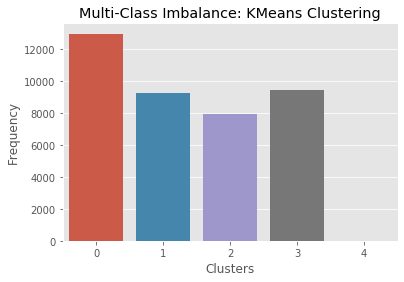

In [30]:
sns.countplot(data=df_scaled_pca_2, x='Clus_km')
plt.ylabel('Frequency')
plt.xlabel('Clusters')
plt.title('Multi-Class Imbalance: KMeans Clustering')
plt.show()

In [31]:
df_scaled_pca_2['Clus_km'].value_counts(normalize=True, ascending=False)*100

0    32.736354
3    23.872465
1    23.373020
2    20.015639
4     0.002522
Name: Clus_km, dtype: float64

In [32]:
# We see that class 4, is much lesser than the rest of the classes.

## Modelling

### Train Test Split

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [34]:
print('Training X Shape:', X_train.shape)
print('Training y Shape:', y_train.shape)
print('Testing X Shape:', X_test.shape)
print('Testing y Shape:', y_test.shape)

Training X Shape: (27750, 38)
Training y Shape: (27750,)
Testing X Shape: (11894, 38)
Testing y Shape: (11894,)


### Decision Tree

In [35]:
from sklearn.tree import DecisionTreeClassifier
dt = DecisionTreeClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(dt.get_params())

Parameters currently in use:

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'presort': 'deprecated',
 'random_state': 0,
 'splitter': 'best'}


#### Random Search Cross Validation

In [36]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]

criterion = ['entropy','gini']
# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,30)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]

# Minimum number of samples required at each leaf node
min_samples_leaf = range(2,50)



# Create the random grid
random_grid = {'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }

pprint(random_grid)

{'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 30),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(2, 50),
 'min_samples_split': [2, 5, 10]}


In [37]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
dt = DecisionTreeClassifier(random_state = 0)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
dt_random = RandomizedSearchCV(estimator=dt, param_distributions=random_grid,
                              n_iter = 100, scoring='f1_weighted', 
                              cv = 5, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
dt_random.fit(X_train, y_train);

Fitting 5 folds for each of 100 candidates, totalling 500 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:    2.8s
[Parallel(n_jobs=-1)]: Done 146 tasks      | elapsed:   30.8s
[Parallel(n_jobs=-1)]: Done 349 tasks      | elapsed:  1.1min
[Parallel(n_jobs=-1)]: Done 500 out of 500 | elapsed:  1.4min finished


In [38]:
dt_random.best_params_

{'min_samples_split': 5,
 'min_samples_leaf': 9,
 'max_features': None,
 'max_depth': 18,
 'criterion': 'entropy'}

In [39]:
# cv results
cv_results_dt = pd.DataFrame(dt_random.cv_results_)
cv_results_dt.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.270476,0.005795,0.005984,6.306761e-04,10,48,auto,4,entropy,"{'min_samples_split': 10, 'min_samples_leaf': ...",0.596254,0.589878,0.601515,0.597504,0.594162,0.595863,0.003834,65,0.601613,0.601420,0.595413,0.602349,0.602056,0.600570,0.002599
1,0.252724,0.009133,0.010173,4.694714e-03,5,28,log2,22,gini,"{'min_samples_split': 5, 'min_samples_leaf': 2...",0.844085,0.834772,0.854644,0.853089,0.841868,0.845692,0.007366,34,0.871373,0.874062,0.872994,0.880097,0.866997,0.873105,0.004246
2,0.300195,0.015112,0.006982,7.008046e-07,5,46,sqrt,21,gini,"{'min_samples_split': 5, 'min_samples_leaf': 4...",0.826682,0.830332,0.835658,0.834781,0.839044,0.833299,0.004321,46,0.850040,0.850824,0.846060,0.853066,0.853476,0.850693,0.002656
3,0.293015,0.025281,0.006383,4.888505e-04,2,35,auto,25,gini,"{'min_samples_split': 2, 'min_samples_leaf': 3...",0.847653,0.844382,0.859163,0.841353,0.831783,0.844867,0.008899,35,0.872038,0.870309,0.876734,0.866926,0.854416,0.868084,0.007531
4,0.022140,0.005140,0.000000,0.000000e+00,2,27,int,25,entropy,"{'min_samples_split': 2, 'min_samples_leaf': 2...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,82,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [40]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", dt_random.best_score_)
dt_random_best = dt_random.best_estimator_
print(dt_random.best_estimator_)

best accuracy 0.92236841232044
DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='entropy',
                       max_depth=18, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=9, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=0, splitter='best')


#### Running the model with best parameters obtained from Random Search CV

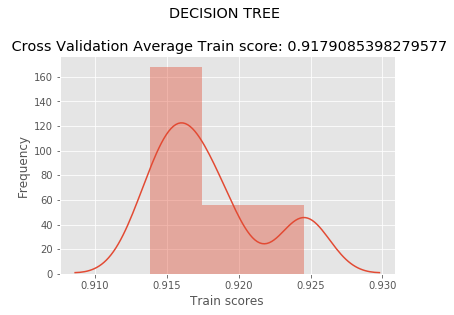

In [41]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_dt = cross_val_score(dt_random_best, X_train, y_train, cv=kfold, scoring='f1_weighted')
sns.distplot(cv_results_dt)
plt.xlabel('Train scores')
plt.ylabel('Frequency')
plt.title('DECISION TREE \n\n Cross Validation Average Train score: {}'.format(np.mean(cv_results_dt)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [42]:
from sklearn.model_selection import cross_val_predict

y_dt_pred_train = cross_val_predict(dt_random_best, X_train, y_train, cv=5)
y_dt_pred_test = cross_val_predict(dt_random_best, X_test, y_test, cv=5)

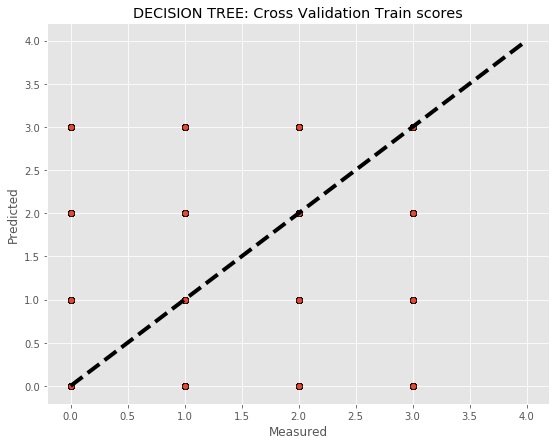

In [43]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('DECISION TREE: Cross Validation Train scores')
plt.show()

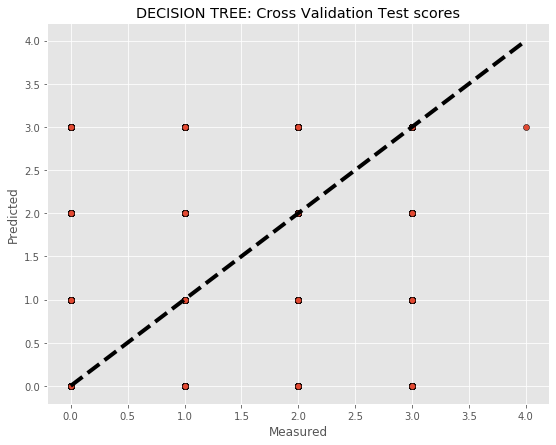

In [44]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('DECISION TREE: Cross Validation Test scores')
plt.show()

##### Classification Report

In [45]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
# y_dt_pred_train = dt_random_best.predict(X_train)
print(classification_report(y_train, y_dt_pred_train))

              precision    recall  f1-score   support

           0       0.92      0.95      0.93      9099
           1       0.93      0.92      0.92      6524
           2       0.91      0.89      0.90      5558
           3       0.93      0.91      0.92      6569

    accuracy                           0.92     27750
   macro avg       0.92      0.92      0.92     27750
weighted avg       0.92      0.92      0.92     27750



In [46]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
# y_dt_pred_test = dt_random_best.predict(X_test)
print(classification_report(y_test, y_dt_pred_test))

              precision    recall  f1-score   support

           0       0.90      0.92      0.91      3879
           1       0.92      0.90      0.91      2742
           2       0.88      0.87      0.87      2377
           3       0.92      0.90      0.91      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.90     11894
   macro avg       0.72      0.72      0.72     11894
weighted avg       0.90      0.90      0.90     11894



##### Confusion Matrix

In [47]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_dt_pred_train))

[[8607  171  188  133]
 [ 232 6016  127  149]
 [ 272  137 4969  180]
 [ 219  163  181 6006]]


In [48]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_dt_pred_test))

[[3581   88  123   87    0]
 [ 136 2480   64   62    0]
 [ 154   70 2066   87    0]
 [ 110   66  106 2613    0]
 [   0    0    0    1    0]]


##### Cohen Kappa score

In [49]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_dt_pred_train)

0.8952287997534251

In [50]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_dt_pred_test)

0.868970390733294

### Random Forest

In [51]:
rf = RandomForestClassifier(random_state=0)

from pprint import pprint

# Look at parameters used by our current forest
print('Parameters currently in use:\n')
pprint(rf.get_params())

Parameters currently in use:

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}


#### Random Search Cross Validation

In [52]:
from sklearn.model_selection import RandomizedSearchCV

# Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
n_estimators = range(1,50)

# splitting criterion
criterion = ['entropy','gini']

# Number of features to consider at every split
max_features = ['auto', 'sqrt','log2','int','float',None]

# Maximum number of levels in tree
#max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
#max_depth.append(None)
max_depth = range(1,50)

# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10, 15, 20]

# Minimum number of samples required at each leaf node
min_samples_leaf = range(1,50)

# Method of selecting samples for training each tree
bootstrap = [True, False]

# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'criterion':criterion,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap
              }

pprint(random_grid)

{'bootstrap': [True, False],
 'criterion': ['entropy', 'gini'],
 'max_depth': range(1, 50),
 'max_features': ['auto', 'sqrt', 'log2', 'int', 'float', None],
 'min_samples_leaf': range(1, 50),
 'min_samples_split': [2, 5, 10, 15, 20],
 'n_estimators': range(1, 50)}


In [53]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier(random_state = 0)
# Random search of parameters, using 5 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=random_grid,
                              n_iter = 50, scoring='f1_weighted', 
                              cv = 5, verbose=2, random_state=0, n_jobs=-1,
                              return_train_score=True)

# Fit the random search model
rf_random.fit(X_train, y_train);

Fitting 5 folds for each of 50 candidates, totalling 250 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:   27.0s
[Parallel(n_jobs=-1)]: Done 170 tasks      | elapsed:  4.5min
[Parallel(n_jobs=-1)]: Done 250 out of 250 | elapsed:  9.0min finished


In [54]:
rf_random.best_params_

{'n_estimators': 32,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'log2',
 'max_depth': 40,
 'criterion': 'gini',
 'bootstrap': False}

In [55]:
# cv results
cv_results_rf = pd.DataFrame(rf_random.cv_results_)
cv_results_rf.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,param_bootstrap,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.121874,0.044245,0.000000,0.000000,19,20,26,int,18,entropy,False,"{'n_estimators': 19, 'min_samples_split': 20, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,50,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,24.962596,1.829291,0.026529,0.001018,7,15,30,None,32,gini,False,"{'n_estimators': 7, 'min_samples_split': 15, '...",0.90546,0.897683,0.908356,0.899033,0.904864,0.903079,0.004054,26,0.920831,0.922891,0.920971,0.918243,0.920482,0.920684,0.001481
2,0.161766,0.039495,0.000000,0.000000,49,15,32,int,21,entropy,True,"{'n_estimators': 49, 'min_samples_split': 15, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,33,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.075996,0.015170,0.000000,0.000000,11,5,26,float,31,entropy,True,"{'n_estimators': 11, 'min_samples_split': 5, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,49,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.076395,0.018887,0.000000,0.000000,9,20,31,int,23,gini,True,"{'n_estimators': 9, 'min_samples_split': 20, '...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,38,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [56]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", rf_random.best_score_)
rf_random_best = rf_random.best_estimator_
print(rf_random_best)

best accuracy 0.9600155604785294
RandomForestClassifier(bootstrap=False, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=40, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=10,
                       min_weight_fraction_leaf=0.0, n_estimators=32,
                       n_jobs=None, oob_score=False, random_state=0, verbose=0,
                       warm_start=False)


#### Running the model with best parameters obtained from Random Search CV

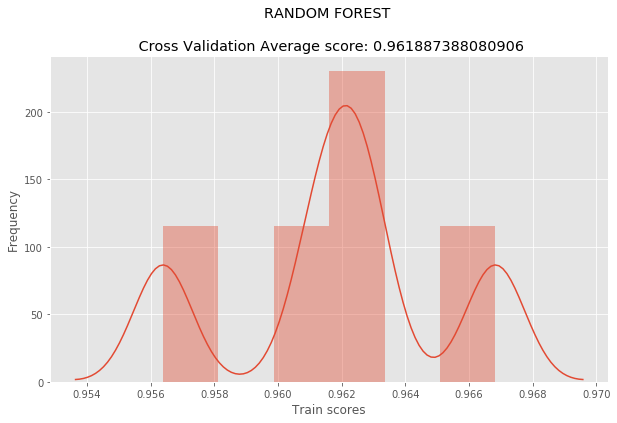

In [57]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_rf = cross_val_score(rf_random_best, X_train, y_train, cv=kfold, scoring='f1_weighted')
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_rf)
plt.title('RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_rf)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [58]:
from sklearn.model_selection import cross_val_predict

y_rf_pred_train = cross_val_predict(rf_random_best, X_train, y_train, cv=5)
y_rf_pred_test = cross_val_predict(rf_random_best, X_test, y_test, cv=5)

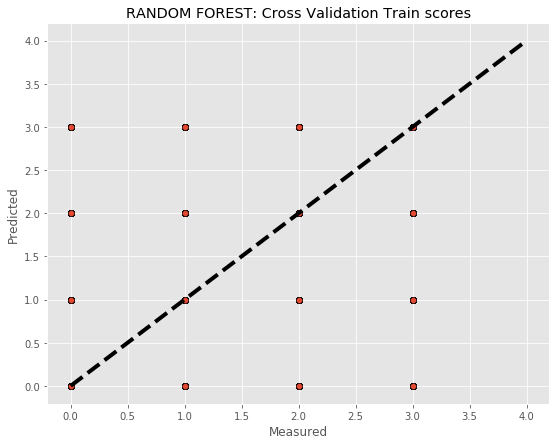

In [59]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Train scores')
plt.show()

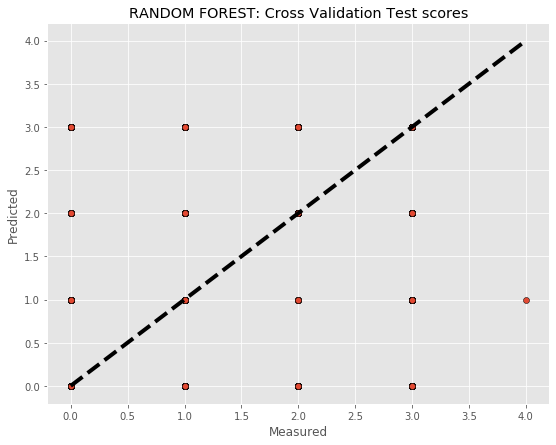

In [60]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('RANDOM FOREST: Cross Validation Test scores')
plt.show()

##### Classification Report

In [61]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_train = rf_random_best.predict(X_train)
print(classification_report(y_train, y_rf_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      9099
           1       0.98      0.95      0.96      6524
           2       0.96      0.96      0.96      5558
           3       0.97      0.94      0.96      6569

    accuracy                           0.96     27750
   macro avg       0.96      0.96      0.96     27750
weighted avg       0.96      0.96      0.96     27750



In [62]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
# y_rf_pred_test = rf_random_best.predict(X_test)
print(classification_report(y_test, y_rf_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      3879
           1       0.97      0.94      0.96      2742
           2       0.97      0.96      0.96      2377
           3       0.97      0.94      0.96      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.96     11894
   macro avg       0.77      0.76      0.77     11894
weighted avg       0.96      0.96      0.96     11894



##### Confusion Matrix

In [63]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_rf_pred_train))

[[8953   27   56   63]
 [ 207 6180   60   77]
 [ 154   24 5324   56]
 [ 207   99   79 6184]]


In [64]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_rf_pred_test))

[[3809   22   17   31    0]
 [  97 2585   27   33    0]
 [  68   11 2271   27    0]
 [  94   38   33 2730    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [65]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_rf_pred_train)

0.9459664746527534

In [66]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_rf_pred_test)

0.9432882910261826

### Decision Tree: Bagging

In [67]:
from sklearn.ensemble import BaggingClassifier

# taking the base model as a Decision Tree
bg_dt = BaggingClassifier(base_estimator=dt_random_best, n_estimators=50, random_state=0, oob_score=True)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_bg_dt = cross_val_score(bg_dt, X_train, y_train, cv=kfold, scoring='f1_weighted')

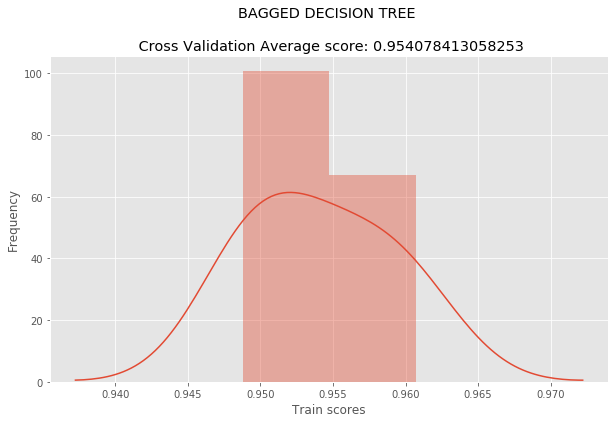

In [68]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_bg_dt)
plt.title('BAGGED DECISION TREE \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_bg_dt)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [69]:
from sklearn.model_selection import cross_val_predict

y_bg_dt_pred_train = cross_val_predict(bg_dt, X_train, y_train, cv=5)
y_bg_dt_pred_test = cross_val_predict(bg_dt, X_test, y_test, cv=5)

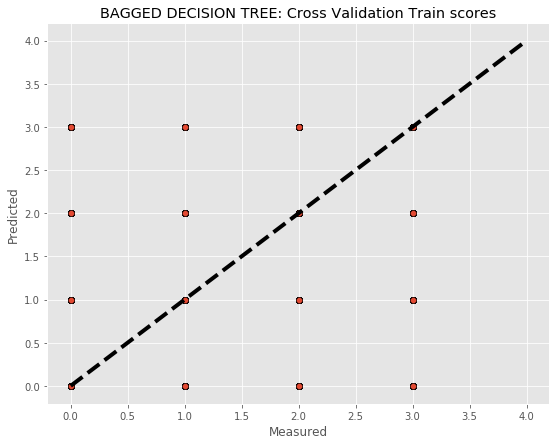

In [70]:
# Decision Tree Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_bg_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('BAGGED DECISION TREE: Cross Validation Train scores')
plt.show()

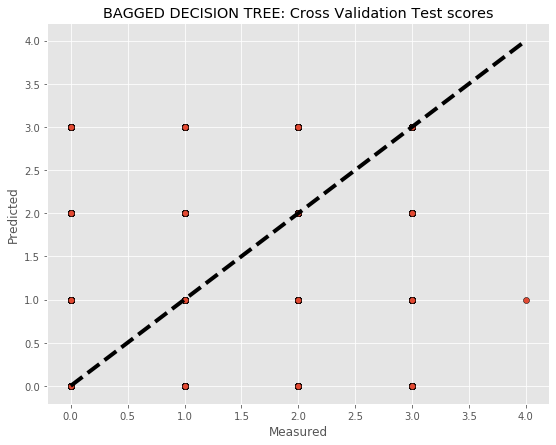

In [71]:
# Decision Tree Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_bg_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('BAGGED DECISION TREE: Cross Validation Test scores')
plt.show()

##### Classification Report

In [72]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_bg_dt_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      9099
           1       0.97      0.95      0.96      6524
           2       0.95      0.94      0.94      5558
           3       0.96      0.95      0.95      6569

    accuracy                           0.96     27750
   macro avg       0.96      0.95      0.95     27750
weighted avg       0.96      0.96      0.96     27750



In [73]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_bg_dt_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.97      0.95      3879
           1       0.96      0.94      0.95      2742
           2       0.95      0.93      0.94      2377
           3       0.95      0.94      0.94      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.95     11894
   macro avg       0.76      0.76      0.76     11894
weighted avg       0.95      0.95      0.95     11894



##### Classification Matrix

In [74]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_bg_dt_pred_train))

[[8866   69   73   91]
 [ 168 6198   65   93]
 [ 197   54 5200  107]
 [ 118   97  110 6244]]


In [75]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_bg_dt_pred_test))

[[3765   32   30   52    0]
 [  73 2586   33   50    0]
 [  98   30 2199   50    0]
 [  71   39   57 2728    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [76]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_bg_dt_pred_train)

0.9395253534307985

In [77]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_bg_dt_pred_test)

0.9300244182336819

### Random Forest: Bagging

In [78]:
from sklearn.ensemble import BaggingClassifier

# taking the base model as a Decision Tree
bg_rf = BaggingClassifier(base_estimator=rf_random_best, n_estimators=50, random_state=0, oob_score=True)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_bg_rf = cross_val_score(bg_rf, X_train, y_train, cv=kfold, scoring='f1_weighted')

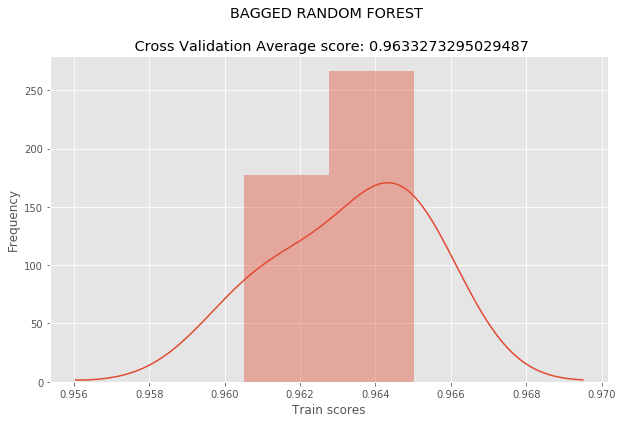

In [79]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_bg_rf)
plt.title('BAGGED RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_bg_rf)))
plt.show()

#### Evaluation Metrics

##### Plotting Cross Val score results

In [80]:
from sklearn.model_selection import cross_val_predict

y_bg_rf_pred_train = cross_val_predict(bg_rf, X_train, y_train, cv=5)
y_bg_rf_pred_test = cross_val_predict(bg_rf, X_test, y_test, cv=5)

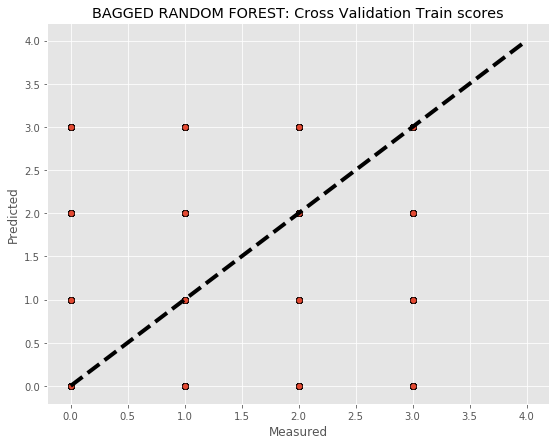

In [81]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_bg_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('BAGGED RANDOM FOREST: Cross Validation Train scores')
plt.show()

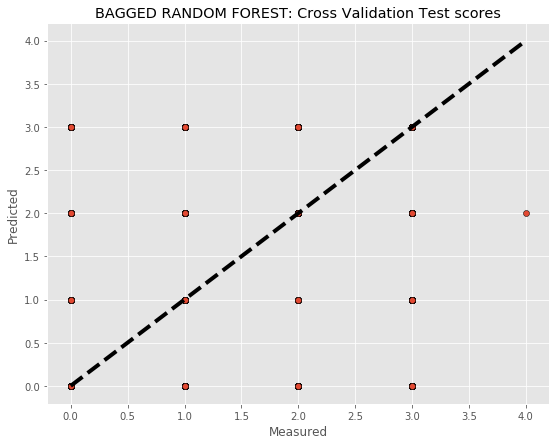

In [82]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_bg_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('BAGGED RANDOM FOREST: Cross Validation Test scores')
plt.show()

##### Classification Report

In [83]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_bg_rf_pred_train))

              precision    recall  f1-score   support

           0       0.94      0.99      0.97      9099
           1       0.98      0.95      0.96      6524
           2       0.97      0.96      0.97      5558
           3       0.98      0.95      0.96      6569

    accuracy                           0.96     27750
   macro avg       0.97      0.96      0.96     27750
weighted avg       0.96      0.96      0.96     27750



In [84]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_bg_rf_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3879
           1       0.97      0.95      0.96      2742
           2       0.97      0.95      0.96      2377
           3       0.97      0.94      0.96      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.96     11894
   macro avg       0.77      0.77      0.77     11894
weighted avg       0.96      0.96      0.96     11894



##### Classification Matrix

In [85]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_bg_rf_pred_train))

[[8999   20   43   37]
 [ 197 6190   63   74]
 [ 141   20 5349   48]
 [ 195   93   65 6216]]


In [86]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_bg_rf_pred_test))

[[3825   16   16   22    0]
 [  79 2609   24   30    0]
 [  70   13 2267   27    0]
 [  96   38   29 2732    0]
 [   0    0    1    0    0]]


##### Cohen Kappa score

In [87]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_bg_rf_pred_train)

0.9514698329192859

In [88]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_bg_rf_pred_test)

0.9476046357536158

### Decison Tree: Boosting

#### Ada Boost:

In [89]:
from sklearn.ensemble import AdaBoostClassifier
ab_dt = AdaBoostClassifier(base_estimator=dt_random_best, n_estimators= 50, random_state=0)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_ab_dt = cross_val_score(ab_dt, X_train, y_train, cv=kfold, scoring='f1_weighted')


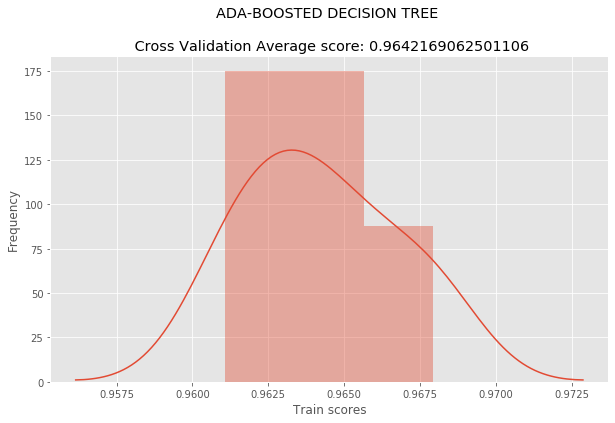

In [90]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_ab_dt)
plt.title('ADA-BOOSTED DECISION TREE \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_ab_dt)))
plt.show()

##### Evaluation Metrics

##### Plotting Cross Val score results

In [91]:
from sklearn.model_selection import cross_val_predict

y_ab_dt_pred_train = cross_val_predict(ab_dt, X_train, y_train, cv=5)
y_ab_dt_pred_test = cross_val_predict(ab_dt, X_test, y_test, cv=5)

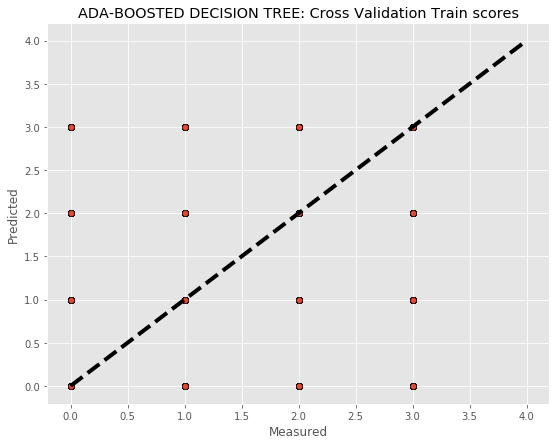

In [92]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_ab_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('ADA-BOOSTED DECISION TREE: Cross Validation Train scores')
plt.show()

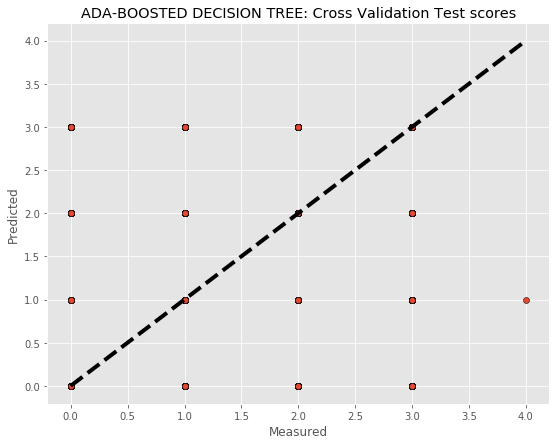

In [93]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_ab_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('ADA-BOOSTED DECISION TREE: Cross Validation Test scores')
plt.show()

##### Classification Report

In [94]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_ab_dt_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97      9099
           1       0.98      0.96      0.97      6524
           2       0.97      0.96      0.96      5558
           3       0.97      0.95      0.96      6569

    accuracy                           0.97     27750
   macro avg       0.97      0.96      0.96     27750
weighted avg       0.97      0.97      0.97     27750



In [95]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_ab_dt_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3879
           1       0.98      0.95      0.97      2742
           2       0.97      0.95      0.96      2377
           3       0.97      0.95      0.96      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.96     11894
   macro avg       0.77      0.77      0.77     11894
weighted avg       0.96      0.96      0.96     11894



##### Classification Matrix

In [96]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_ab_dt_pred_train))

[[8962   32   48   57]
 [ 165 6243   52   64]
 [ 142   25 5314   77]
 [ 168   63   74 6264]]


In [97]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_ab_dt_pred_test))

[[3825   13   19   22    0]
 [  77 2615   23   27    0]
 [  83   16 2249   29    0]
 [  91   25   27 2752    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [98]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_ab_dt_pred_train)

0.952900210283665

In [99]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_ab_dt_pred_test)

0.9485056830686618

#### Gradient Boost

In [100]:
from sklearn.ensemble import GradientBoostingClassifier
gb_dt = GradientBoostingClassifier(n_estimators= 50, random_state=0)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_gb_dt = cross_val_score(gb_dt, X_train, y_train, cv=kfold, scoring='f1_weighted')


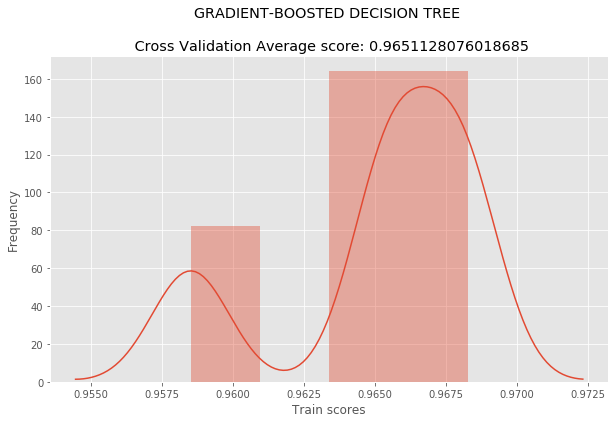

In [101]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_gb_dt)
plt.title('GRADIENT-BOOSTED DECISION TREE \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_gb_dt)))
plt.show()

##### Evaluation Metrics

##### Plotting Cross Val score results

In [102]:
from sklearn.model_selection import cross_val_predict

y_gb_dt_pred_train = cross_val_predict(gb_dt, X_train, y_train, cv=5)
y_gb_dt_pred_test = cross_val_predict(gb_dt, X_test, y_test, cv=5)

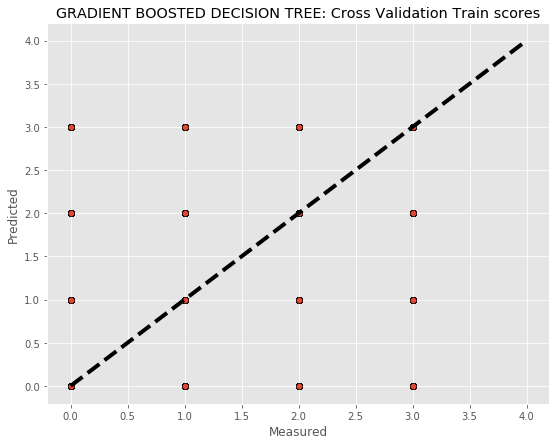

In [103]:
# Random Forest Bagging Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_gb_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('GRADIENT BOOSTED DECISION TREE: Cross Validation Train scores')
plt.show()

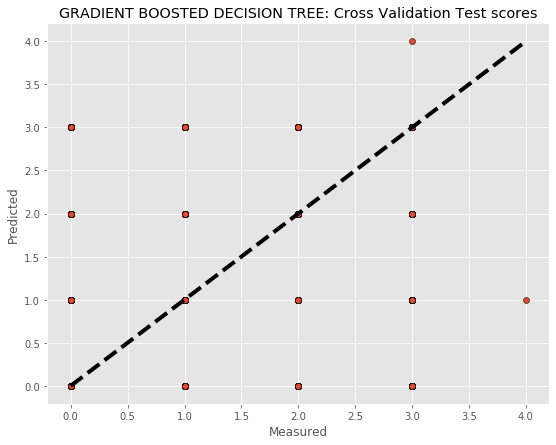

In [104]:
# Random Forest Bagging Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_gb_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('GRADIENT BOOSTED DECISION TREE: Cross Validation Test scores')
plt.show()

##### Classification Report

In [105]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_gb_dt_pred_train))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      9099
           1       0.98      0.96      0.97      6524
           2       0.96      0.95      0.96      5558
           3       0.96      0.96      0.96      6569

    accuracy                           0.96     27750
   macro avg       0.97      0.96      0.96     27750
weighted avg       0.96      0.96      0.96     27750



In [106]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_gb_dt_pred_test))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      3879
           1       0.97      0.96      0.96      2742
           2       0.96      0.95      0.96      2377
           3       0.96      0.96      0.96      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.96     11894
   macro avg       0.77      0.77      0.77     11894
weighted avg       0.96      0.96      0.96     11894



##### Classification Matrix

In [107]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_gb_dt_pred_train))

[[8954   41   65   39]
 [ 143 6257   66   58]
 [ 134   29 5256  139]
 [ 115   88   62 6304]]


In [108]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_gb_dt_pred_test))

[[3788   27   36   28    0]
 [  59 2624   28   31    0]
 [  53   15 2261   48    0]
 [  51   33   26 2784    1]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [109]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_gb_dt_pred_train)

0.9523318844362155

In [110]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_gb_dt_pred_test)

0.9503944325934914

#### XG Boost

In [111]:
from sklearn.model_selection import RandomizedSearchCV
import xgboost as xgb

xgb_dt = xgb.XGBClassifier(random_state = 0)
parameters = {
     "eta"    : [0.05, 0.10, 0.15, 0.20, 0.25, 0.30 ] ,
     "max_depth"        : [ 3, 4, 5, 6, 8, 10, 12, 15],
     "min_child_weight" : [ 1, 3, 5, 7 ],
     "gamma"            : [ 0.0, 0.1, 0.2 , 0.3, 0.4 ],
     "colsample_bytree" : [ 0.3, 0.4, 0.5 , 0.7 ]
     }

xgb_random = RandomizedSearchCV(xgb_dt,
                    parameters, n_jobs=-1,
                    scoring="f1_weighted",
                    cv=5, n_iter = 15,verbose=2, random_state=0,
                    return_train_score=True)

xgb_random.fit(X_train, y_train)

Fitting 5 folds for each of 15 candidates, totalling 75 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed:  6.4min
[Parallel(n_jobs=-1)]: Done  75 out of  75 | elapsed: 18.5min finished


RandomizedSearchCV(cv=5, error_score=nan,
                   estimator=XGBClassifier(base_score=None, booster=None,
                                           colsample_bylevel=None,
                                           colsample_bynode=None,
                                           colsample_bytree=None, gamma=None,
                                           gpu_id=None, importance_type='gain',
                                           interaction_constraints=None,
                                           learning_rate=None,
                                           max_delta_step=None, max_depth=None,
                                           min_child_weight=None, missing=nan,
                                           monotone_constraints=None,
                                           n...
                                           validate_parameters=False,
                                           verbosity=None),
                   iid='deprecated', n_iter=15, n_

In [112]:
xgb_random.best_params_

{'min_child_weight': 7,
 'max_depth': 4,
 'gamma': 0.2,
 'eta': 0.2,
 'colsample_bytree': 0.7}

In [113]:
# cv results
cv_results_xgb = pd.DataFrame(xgb_random.cv_results_)
cv_results_xgb.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_child_weight,param_max_depth,param_gamma,param_eta,param_colsample_bytree,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,133.414736,3.645371,0.601191,0.065462,1,6,0,0.3,0.5,"{'min_child_weight': 1, 'max_depth': 6, 'gamma...",0.976222,0.977111,0.979999,0.976937,0.981975,0.978449,0.002185,5,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
1,117.112654,5.273706,0.562695,0.067681,7,6,0.1,0.25,0.5,"{'min_child_weight': 7, 'max_depth': 6, 'gamma...",0.978193,0.978378,0.981080,0.977478,0.980897,0.979205,0.001488,2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
2,135.987679,6.004964,0.617548,0.010178,3,10,0.1,0.25,0.4,"{'min_child_weight': 3, 'max_depth': 10, 'gamm...",0.973161,0.970813,0.978019,0.973514,0.976383,0.974378,0.002538,12,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
3,94.039139,3.425490,0.278056,0.003700,1,3,0.2,0.15,0.7,"{'min_child_weight': 1, 'max_depth': 3, 'gamma...",0.974402,0.974601,0.980718,0.973675,0.976380,0.975955,0.002542,9,0.990718,0.990359,0.989458,0.990450,0.990268,0.990251,0.000424
4,51.536481,2.212917,0.287630,0.005556,7,3,0.1,0.3,0.3,"{'min_child_weight': 7, 'max_depth': 3, 'gamma...",0.976396,0.975327,0.980542,0.975129,0.978367,0.977152,0.002047,8,0.996486,0.996216,0.996216,0.996035,0.995540,0.996099,0.000314


In [114]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", xgb_random.best_score_)
xgb_random_best = xgb_random.best_estimator_
print(xgb_random_best)

best accuracy 0.9792768956956921
XGBClassifier(base_score=0.5, booster=None, colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, eta=0.2, gamma=0.2,
              gpu_id=-1, importance_type='gain', interaction_constraints=None,
              learning_rate=0.200000003, max_delta_step=0, max_depth=4,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=0, num_parallel_tree=1,
              objective='multi:softprob', random_state=0, reg_alpha=0,
              reg_lambda=1, scale_pos_weight=None, subsample=1,
              tree_method=None, validate_parameters=False, verbosity=None)


In [115]:
# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_xgb = cross_val_score(xgb_random_best, X_train, y_train, cv=kfold, scoring='f1_weighted')

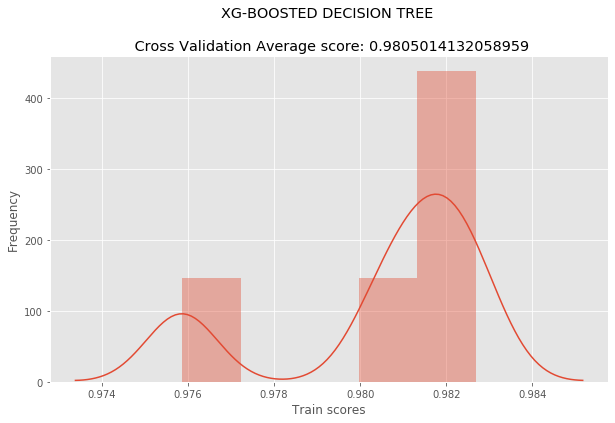

In [116]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_xgb)
plt.title('XG-BOOSTED DECISION TREE \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_xgb)))
plt.show()

##### Evaluation Metrics

##### Plotting Cross Val score results

In [117]:
from sklearn.model_selection import cross_val_predict

y_xgb_dt_pred_train = cross_val_predict(xgb_random_best, X_train, y_train, cv=5)
y_xgb_dt_pred_test = cross_val_predict(xgb_random_best, X_test, y_test, cv=5)

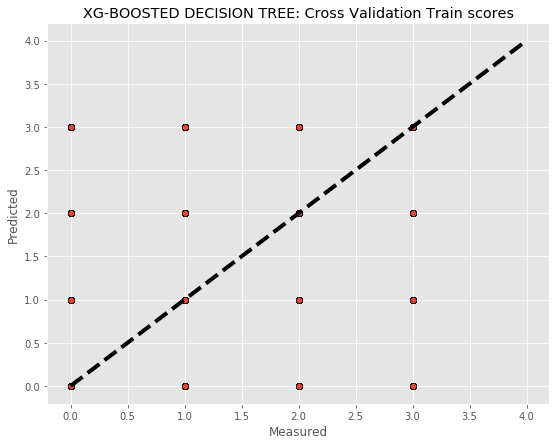

In [118]:
# Random Forest xg-boosted Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_xgb_dt_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('XG-BOOSTED DECISION TREE: Cross Validation Train scores')
plt.show()

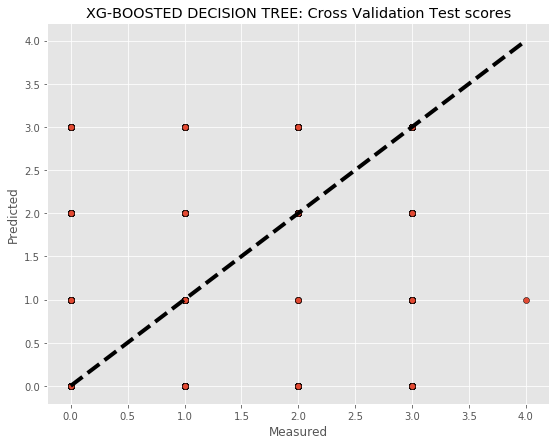

In [119]:
# Random Forest xg-boosted Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_xgb_dt_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('XG-BOOSTED DECISION TREE: Cross Validation Test scores')
plt.show()

##### Classification Report

In [120]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_xgb_dt_pred_train))

              precision    recall  f1-score   support

           0       0.98      0.99      0.98      9099
           1       0.99      0.98      0.98      6524
           2       0.98      0.98      0.98      5558
           3       0.98      0.97      0.98      6569

    accuracy                           0.98     27750
   macro avg       0.98      0.98      0.98     27750
weighted avg       0.98      0.98      0.98     27750



In [121]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_xgb_dt_pred_test))

              precision    recall  f1-score   support

           0       0.97      0.98      0.98      3879
           1       0.98      0.97      0.98      2742
           2       0.97      0.97      0.97      2377
           3       0.98      0.97      0.97      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.97     11894
   macro avg       0.78      0.78      0.78     11894
weighted avg       0.97      0.97      0.97     11894



##### Classification Matrix

In [122]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_xgb_dt_pred_train))

[[8982   26   56   35]
 [  70 6387   34   33]
 [  68   19 5422   49]
 [  91   50   44 6384]]


In [123]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_xgb_dt_pred_test))

[[3812   19   27   21    0]
 [  45 2660   19   18    0]
 [  33    6 2314   24    0]
 [  46   22   24 2803    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [124]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_xgb_dt_pred_train)

0.9720251172641339

In [125]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_xgb_dt_pred_test)

0.9653882359177652

### Random Forest: Boosting

#### Ada Boost

In [126]:
from sklearn.ensemble import AdaBoostClassifier
ab_rf = AdaBoostClassifier(base_estimator=rf_random_best, n_estimators= 50, random_state=0)

# K-fold cross val
kfold = KFold(shuffle=True, n_splits=5, random_state=0)
cv_results_ab_rf = cross_val_score(ab_rf, X, y, cv=kfold, scoring='f1_weighted')


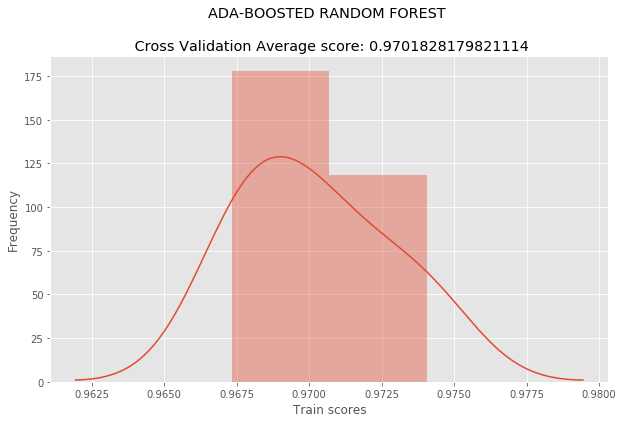

In [127]:
plt.figure(figsize=(10,6))
plt.xlabel('Train scores')
plt.ylabel('Frequency')
sns.distplot(cv_results_ab_rf)
plt.title('ADA-BOOSTED RANDOM FOREST \n\n Cross Validation Average score: {}'.format(np.mean(cv_results_ab_rf)))
plt.show()

##### Evaluation Metrics

##### Plotting Cross Val score results

In [128]:
from sklearn.model_selection import cross_val_predict

y_ab_rf_pred_train = cross_val_predict(ab_rf, X_train, y_train, cv=5)
y_ab_rf_pred_test = cross_val_predict(ab_rf, X_test, y_test, cv=5)

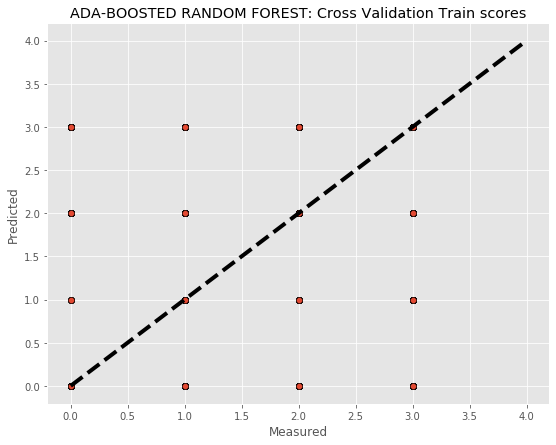

In [129]:
# Random Forest Ada-Boosting Cross Validation Train scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_train, y_ab_rf_pred_train, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('ADA-BOOSTED RANDOM FOREST: Cross Validation Train scores')
plt.show()

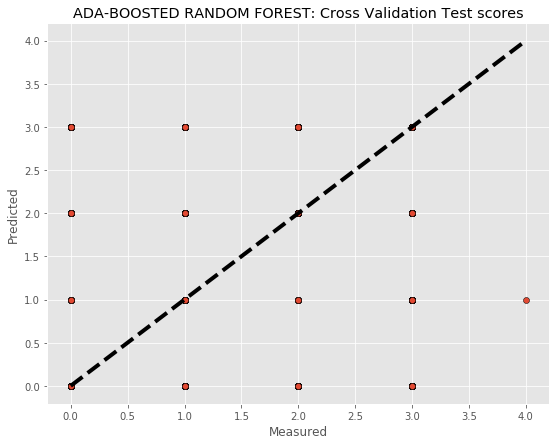

In [130]:
# Random Forest Ada-Boosting Cross Validation Test scores
fig, ax = plt.subplots(figsize=(9,7))
ax.scatter(y_test, y_ab_rf_pred_test, edgecolors=(0, 0, 0))
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
ax.set_title('ADA-BOOSTED RANDOM FOREST: Cross Validation Test scores')
plt.show()

##### Classification Report

In [131]:
# classification Report for Train
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_train, y_ab_rf_pred_train))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      9099
           1       0.98      0.96      0.97      6524
           2       0.96      0.97      0.97      5558
           3       0.98      0.95      0.97      6569

    accuracy                           0.97     27750
   macro avg       0.97      0.97      0.97     27750
weighted avg       0.97      0.97      0.97     27750



In [132]:
# classification Report for Test
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, y_ab_rf_pred_test))

              precision    recall  f1-score   support

           0       0.94      0.99      0.96      3879
           1       0.98      0.95      0.96      2742
           2       0.97      0.96      0.96      2377
           3       0.97      0.95      0.96      2895
           4       0.00      0.00      0.00         1

    accuracy                           0.96     11894
   macro avg       0.77      0.77      0.77     11894
weighted avg       0.96      0.96      0.96     11894



##### Classification Matrix

In [133]:
# confusion matrix for Train
print(confusion_matrix(y_train,y_ab_rf_pred_train))

[[8989   11   51   48]
 [ 165 6243   67   49]
 [ 119   18 5374   47]
 [ 154   68   80 6267]]


In [134]:
# confusion matrix for Test
print(confusion_matrix(y_test,y_ab_rf_pred_test))

[[3822   13   20   24    0]
 [  81 2605   28   28    0]
 [  60   12 2279   26    0]
 [  95   31   27 2742    0]
 [   0    1    0    0    0]]


##### Cohen Kappa score

In [135]:
# Cohen's Kappa coefficient for Train
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_train, y_ab_rf_pred_train)

0.95729203649203

In [136]:
# Cohen's Kappa coefficient for Test
from sklearn.metrics import cohen_kappa_score

cohen_kappa_score(y_test, y_ab_rf_pred_test)

0.9493184200526749